<a href="https://colab.research.google.com/github/pchunter97/Clasificador/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CARGA DE IMAGENES

In [ ]:
import tensorflow as tf
path='drive/MyDrive/BDC/DATASET/TRAIN'

x_train = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2, subset="training",seed=1,image_size=(256,256), batch_size=32,label_mode='categorical')
x_val = tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2,subset="validation",seed=1,image_size=(256,256), batch_size=32,label_mode='categorical')

Found 22564 files belonging to 2 classes.
Using 18052 files for training.
Found 22564 files belonging to 2 classes.
Using 4512 files for validation.


In [ ]:
path_test ='drive/MyDrive/BDC/DATASET/TEST'
x_test=tf.keras.preprocessing.image_dataset_from_directory(path_test,seed=1, image_size=(256,256),batch_size=32, label_mode='categorical')

Found 2513 files belonging to 2 classes.


In [ ]:
x_train.class_names

['O', 'R']

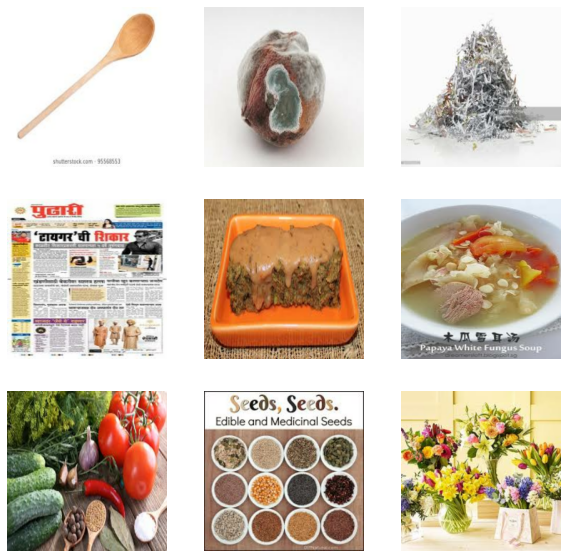

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
normalizacion=tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x_train_norm = x_train.map(lambda x,y: (normalizacion(x),y))

In [ ]:
x_val_norm=x_val.map(lambda x,y: (normalizacion(x),y))

In [ ]:
from keras.datasets import mnist   #Para obtener dataset MNIST
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import ModelCheckpoint
from keras.utils.vis_utils import plot_model

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(26, 26, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(26, 26, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(26, 26, 32)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 28, 28, 256)      

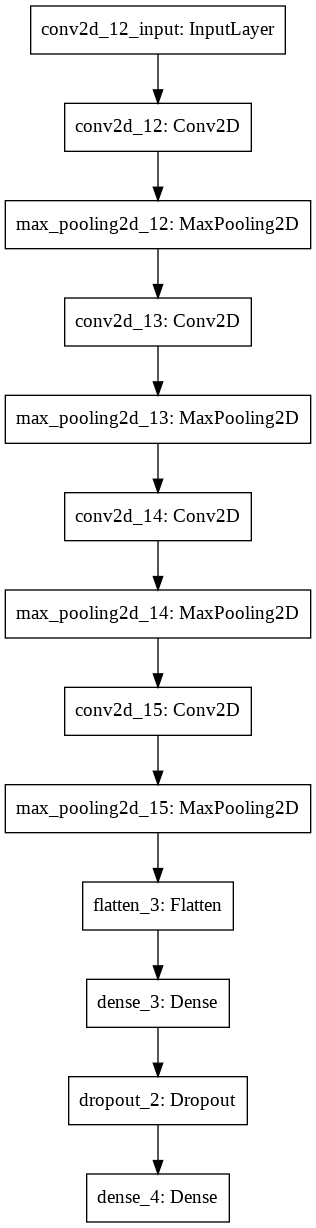

In [ ]:
plot_model(model)

In [ ]:
model.compile(optimizer="sgd", loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='cnn.model.best.hdf5', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(x_train_norm,validation_data=x_val_norm,epochs=10,batch_size=32,callbacks=[checkpointer],verbose=1)

Epoch 1/10
565/565 [==============================] - 90s 157ms/step - loss: 0.5597 - accuracy: 0.7639 - val_loss: 0.4356 - val_accuracy: 0.8070

Epoch 00001: val_loss improved from inf to 0.43560, saving model to cnn.model.best.hdf5
Epoch 2/10
565/565 [==============================] - 89s 156ms/step - loss: 0.4148 - accuracy: 0.8190 - val_loss: 0.5497 - val_accuracy: 0.7680

Epoch 00002: val_loss did not improve from 0.43560
Epoch 3/10
565/565 [==============================] - 89s 156ms/step - loss: 0.3928 - accuracy: 0.8298 - val_loss: 1.1646 - val_accuracy: 0.4368

Epoch 00003: val_loss did not improve from 0.43560
Epoch 4/10
565/565 [==============================] - 89s 156ms/step - loss: 0.3789 - accuracy: 0.8346 - val_loss: 0.3907 - val_accuracy: 0.8296

Epoch 00004: val_loss improved from 0.43560 to 0.39072, saving model to cnn.model.best.hdf5
Epoch 5/10
565/565 [==============================] - 89s 156ms/step - loss: 0.3593 - accuracy: 0.8468 - val_loss: 0.6003 - val_accura

 La accuracy durante la prueba es 87.3532% 


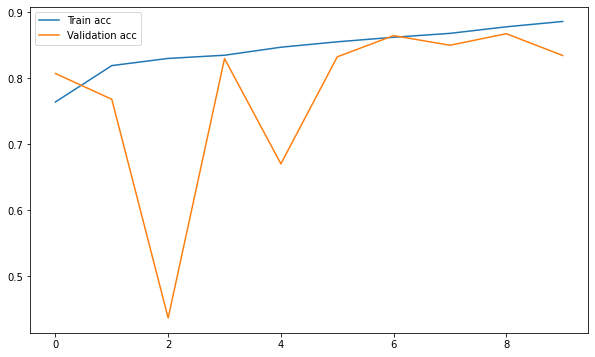

In [ ]:
acc = model.evaluate(x_train, verbose=0)
print(' La accuracy durante la prueba es %.4f%% ' % (acc[1] * 100.0))
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

#Pruebas

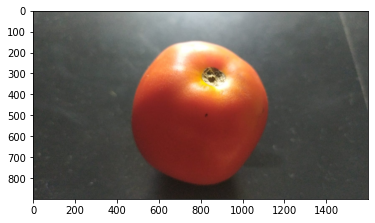

Residuo: Organico


0

In [76]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as img

longitud, altura = 256, 256
modelo = 'cnn.model.best.hdf5'
cnn = load_model(modelo)

def predict(file):

  image = img.imread(file)
  plt.imshow(image, cmap=None)
  plt.show()

  x = load_img(file, target_size=(longitud, altura))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = cnn.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("Residuo: Organico")
  elif answer == 1:
    print("Residuo: Inorganico")

  return answer

predict('./drive/MyDrive/BDC/DATASET/UPLOADED/tom2.jpg')